# Fake News Data Cleaning & EDA

### by Nur Adlina binti Ibrahim (1191101036) 

FYP ID: FYP01-DS-T2430-0009

There are 5 datas, collected from Kaggle, that will be experimented in this project to determine which data is most suitable to be used on Fake News Detection System using Machine Learning Techniques Project. Before starting the experiment, the data needs to be explored and cleaned for a smoother, consistent and efficient workflow. The variables for each datasets are shown below:

Data1 = FakeNewsNet (BuzzFeed Dataset)

Data2 = FakeNewsNet (PolitiFact Dataset)

Data3 = WELFake News Dataset

Data4 = ISOT News Dataset


### 4. ISOT

In [1]:

import numpy as np
import pandas as pd
from matplotlib.pylab import plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import pickle


In [2]:
real_news = 'C:/Users/Lina/Desktop/FYP/fyp2/FakeNewsDataset/ISOT/True.csv'
fake_news = 'C:/Users/Lina/Desktop/FYP/fyp2/FakeNewsDataset/ISOT/Fake.csv'

In [3]:
data4_real = pd.read_csv(real_news)
data4_fake = pd.read_csv(fake_news)

In [4]:
data4_real.shape

(21417, 4)

In [5]:
data4_real['label'] = 1
data4_fake['label'] = 0

In [6]:
data4 = pd.concat([data4_real,data4_fake],axis=0)

In [7]:
data4.shape

(44898, 5)

In [8]:
data4.head(5)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [9]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [10]:
data4["label"].value_counts()

label
0    23481
1    21417
Name: count, dtype: int64

In [11]:
data4.drop(columns=["date"],inplace=True)

In [12]:
print(data4.isnull().sum())

title      0
text       0
subject    0
label      0
dtype: int64


In [13]:
print(data4.duplicated(subset = 'text').sum())

6252


In [14]:
data4 = data4.drop_duplicates(subset = 'text')

In [15]:
print(data4.duplicated(subset = 'text').sum())

0


In [ ]:
import re
import string

basic_stopwords = set([
    "the", "and", "is", "in", "it", "of", "on", "this", "that", "to", "a", "an", 
    "for", "with", "as", "by", "at", "from", "but", "be"
])

def preprocess_text(text):
    text = text.lower() # Lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    words = re.findall(r'\b\w+\b', text) # Tokenize using regex 
    cleaned_words = [word for word in words if word.isalpha() and word not in basic_stopwords] # Filter stopwords and keep alphabetic words
    
    return " ".join(cleaned_words)


In [17]:
data4['clean_text'] = data4['text'].apply(preprocess_text)

In [18]:
#ratio of real and fake news
y = data4.label
y.value_counts(normalize=True).rename({1: 'real', 0: 'fake'}) 

label
real    0.548362
fake    0.451638
Name: proportion, dtype: float64

Percentage of articles:

Real News : 52%

Fake News : 48%

In [19]:
# add 'body_len' column to check length of text for each article
data4["title_text"] = data4["title"] + data4["text"]
data4["body_len"] = data4["title_text"].apply(lambda x: len(x) - x.count(" "))
data4.head()

,title,text,subject,label,clean_text,title_text,body_len
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,washington reuters head conservative republica...,"As U.S. budget fight looms, Republicans flip t...",3962
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,washington reuters transgender people will all...,U.S. military to accept transgender recruits o...,3509
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,washington reuters special counsel investigati...,Senior U.S. Republican senator: 'Let Mr. Muell...,2375
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,washington reuters trump campaign adviser geor...,FBI Russia probe helped by Australian diplomat...,2136
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,seattlewashington reuters president donald tru...,Trump wants Postal Service to charge 'much mor...,4400


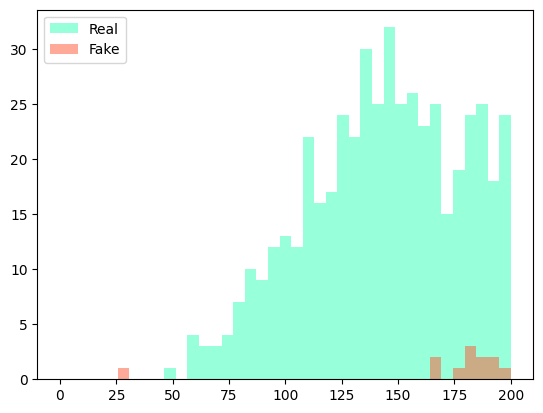

In [20]:
bins = np.linspace(0, 200, 40)

plt.hist(data4[data4["label"]== 0]["body_len"], bins, alpha=0.5, label="Real", color="#33FFB8")
plt.hist(data4[data4["label"]== 1]["body_len"], bins, alpha=0.5, label="Fake", color="#FF5733")
plt.legend(loc="upper left")
plt.show()

Based on the histogram above, the length of text in real news article are mostly longer than fake news.

Text(0.5, 1.0, 'Distribution of Fake/Real News')

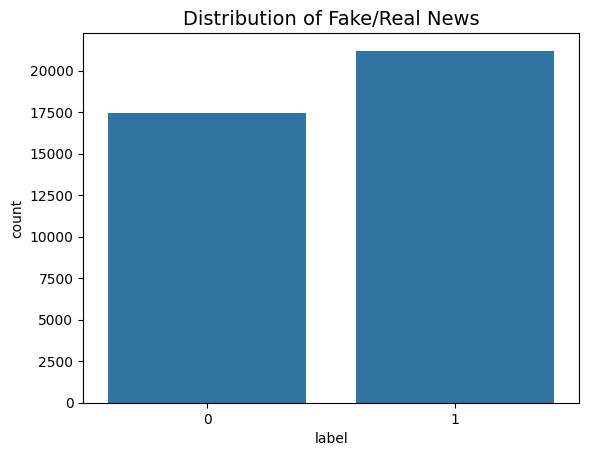

In [21]:
class_names = ['fake', 'real'] 
label_count = data4.label.value_counts()
sns.barplot(x=label_count.index, y=label_count)
plt.title('Distribution of Fake/Real News',fontsize =14)

In [22]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data4['text'], y, test_size=0.33, random_state=53)

In [24]:
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 25892
Test set size: 12754


Data Visualisation of Article News titles

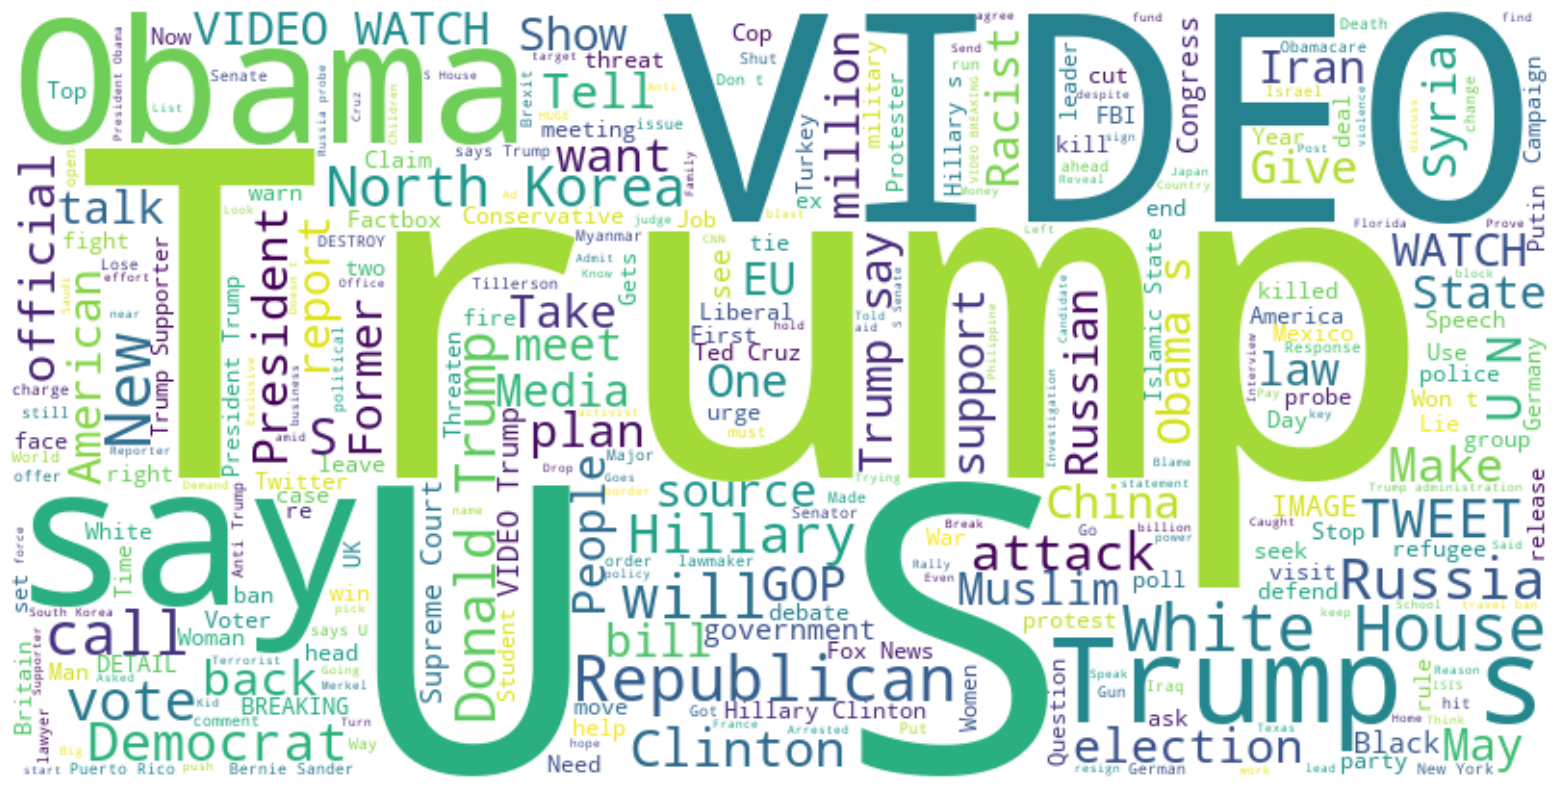

In [25]:
titles = ' '.join(title for title in data4['title'])
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(titles)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Data Visualisation of text in Fake News articles


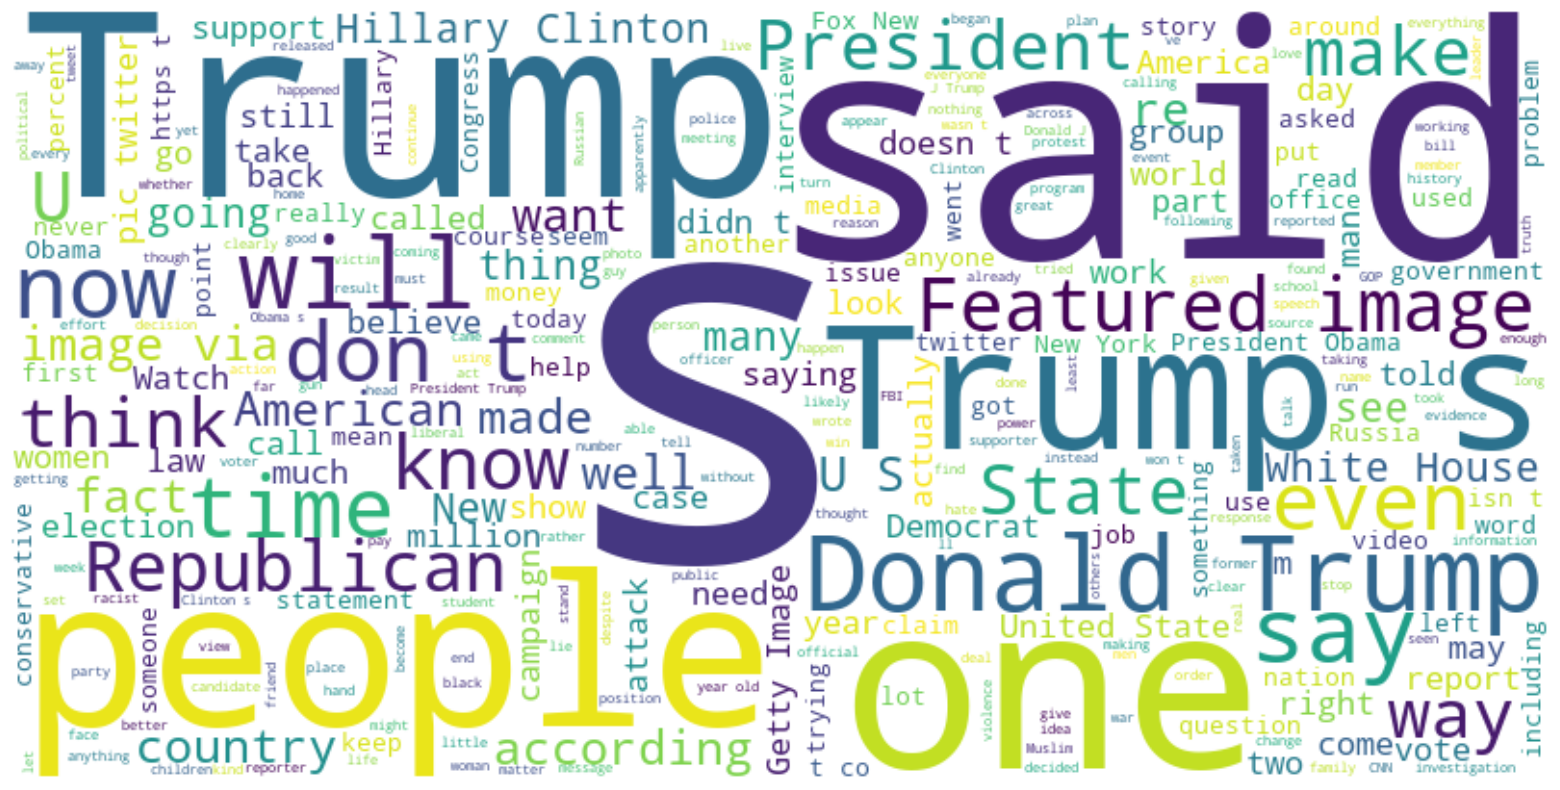

In [26]:
fake_news = X_train[y_train == 0]
real_news = X_train[y_train == 1]
fake_texts = ' '.join(text for text in fake_news)
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(fake_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Data Visualisation of text in Real News articles


<function matplotlib.pyplot.show(close=None, block=None)>

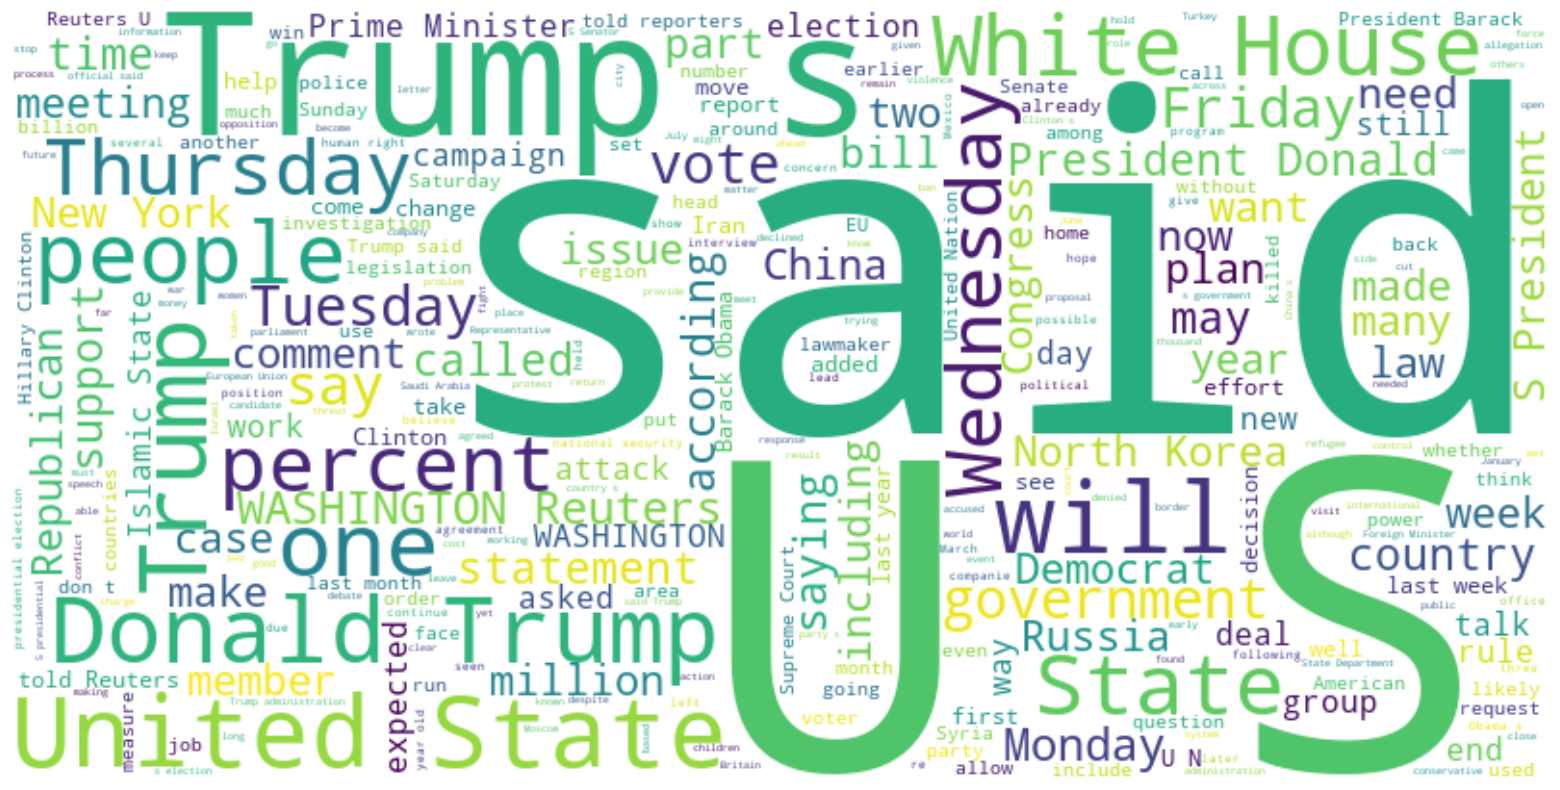

In [27]:
real_texts = ' '.join(text for text in real_news)
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(real_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

In [28]:
# Fitting and transforming the training data, and transform the test data
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [29]:
print("Training vector shape:", count_train.shape)
print("Testing vector shape:", count_test.shape)


Training vector shape: (25892, 100636)
Testing vector shape: (12754, 100636)


In [30]:
print(data4['label'].value_counts())
print(data4['label'].unique())

label
1    21192
0    17454
Name: count, dtype: int64
[1 0]


In [31]:
# Plot for fake news
vectorizer_fake = CountVectorizer(stop_words='english', max_features=5000)
fake_matrix = vectorizer_fake.fit_transform(fake_news)
fake_word_freq = fake_matrix.sum(axis=0).A1
fake_words = vectorizer_fake.get_feature_names_out()

fake_df = pd.DataFrame({'word': fake_words, 'count': fake_word_freq})
top_fake = fake_df.sort_values(by='count', ascending=False).head(20)

# Plot for real news
vectorizer_real = CountVectorizer(stop_words='english', max_features=5000)
real_matrix = vectorizer_real.fit_transform(real_news)
real_word_freq = real_matrix.sum(axis=0).A1
real_words = vectorizer_real.get_feature_names_out()

real_df = pd.DataFrame({'word': real_words, 'count': real_word_freq})
top_real = real_df.sort_values(by='count', ascending=False).head(20)

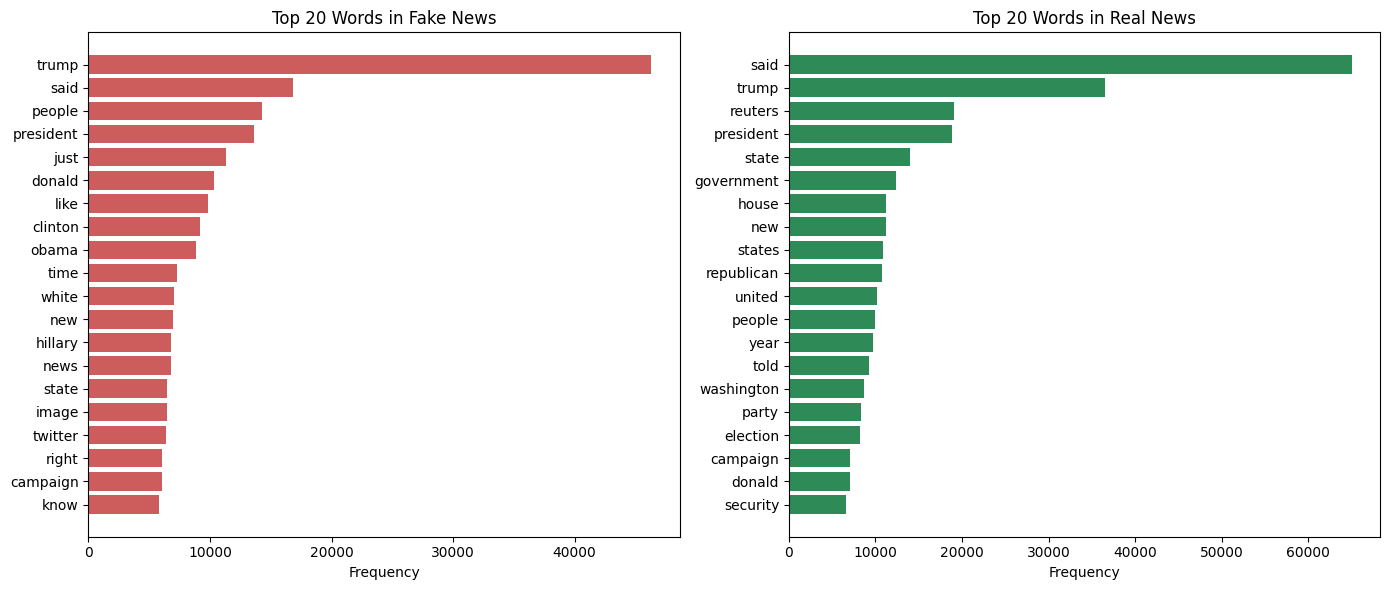

In [32]:
plt.figure(figsize=(14, 6))

# Plot for Fake News
plt.subplot(1, 2, 1)
plt.barh(top_fake['word'], top_fake['count'], color='indianred')
plt.title('Top 20 Words in Fake News')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()

# Plot for Real News
plt.subplot(1, 2, 2)
plt.barh(top_real['word'], top_real['count'], color='seagreen')
plt.title('Top 20 Words in Real News')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [31]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)

MultinomialNB()

In [32]:
pred = nb_classifier.predict(count_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      5712
           1       0.95      0.96      0.95      7042

    accuracy                           0.95     12754
   macro avg       0.95      0.95      0.95     12754
weighted avg       0.95      0.95      0.95     12754



Text(70.72222222222221, 0.5, 'Real Labels')

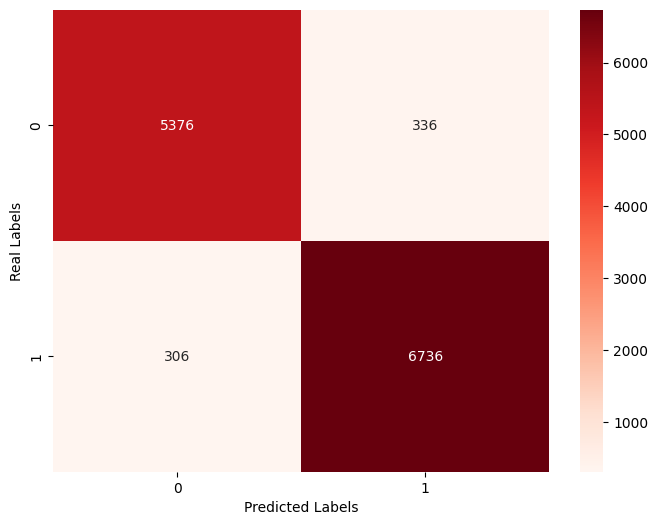

In [33]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test,pred), annot=True, 
            fmt='', cmap='Reds')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

In [34]:
# Assume count_test and y_test are already defined
preds = nb_classifier.predict(count_test)

for i in range(5):
    print("Text:", X_test.iloc[i])
    print("Actual Label (0 = fake, 1 = real):", y_test.iloc[i])
    print("Predicted:", preds[i])
    print("Result:", "REAL" if preds[i] == 1 else "FAKE")
    print("------")


Text: (Reuters) - Florida Power & Light said on Wednesday it had provided power to part of a nursing home that housed six residents who died after the facility lost electricity due to Hurricane Irma, adding that it was not on a county priority list for emergency power restoration.    Parts of the facility itself were energized by FPL, I can t give you anything more specific than that at this point,  FPL spokesman Rob Gould told a news conference, referring to the  Rehabilitation Center of Hollywood Hills.  Two elderly residents were found dead at the nursing home, and four later died at a hospital. Police opened a criminal investigation at the nursing home in Broward County, which is north of Miami.  Some residents were evacuated on early Sunday morning and some woke up feeling sick at the center, which had been without air conditioning, Broward County Mayor Barbara Sharief said.  Gould said FPL met with Broward County officials in March before the storm season to discuss what faciliti

In [35]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300)
model.fit(count_train, y_train)

RandomForestClassifier(n_estimators=300)

In [36]:
pred2 = model.predict(count_test)

In [37]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5712
           1       0.98      1.00      0.99      7042

    accuracy                           0.98     12754
   macro avg       0.99      0.98      0.98     12754
weighted avg       0.98      0.98      0.98     12754



Text(70.72222222222221, 0.5, 'Real Labels')

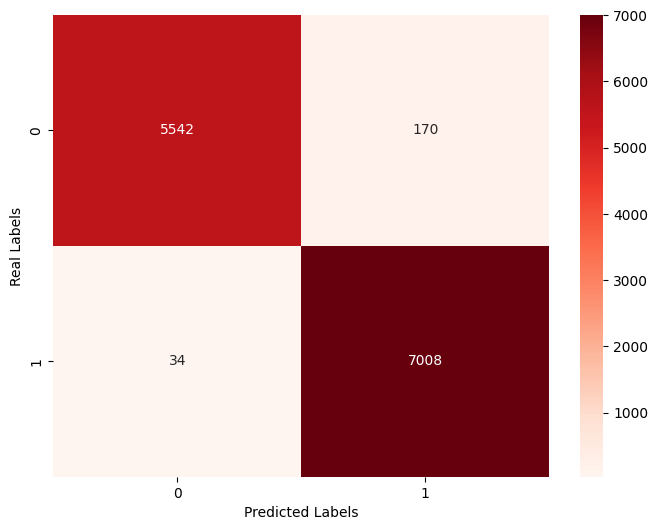

In [38]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test,pred2), annot=True, 
            fmt='', cmap='Reds')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

# Saving the models for future use

In [ ]:
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f) 

with open('naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(nb_classifier, f)

#CountVectorizer
with open('count_vectorizer.pkl', 'wb') as f:
    pickle.dump(count_vectorizer, f)
